<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os
import sys

path = os.getcwd().split("/")[:-1]
path = "/".join(path)
sys.path.append(path)


In [2]:
from IPython.display import Image
import numpy as np
from models.logNormPSM import LogNormPSM
from models.altNormPSM import NormPSM as Lnpsm
from models.normPSM import NormPSM
from models.GAModel import GAModel
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import math

In [3]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

## Initial Values of System

**M**: *int* = Num of sequences;

**n_max**: *int* = Number of pairs in native arrangment, where n in {0, ..., M};

**n_bins**: *int* = Number of intervals in I;

**i_nat**: *float* = Value of i for native arrangment;

**i_0**: *float* = I mean for arrangments with n = 0;

**sigma2_0**: *float* = Variance of I for arrangments with n = 0;

**n_step**: *int* = Max n transition in genetic algorithm.

In [4]:
M = 10             
n_max = M + 1 
n_bins = M + 1 
i_nat = 7
i_0 = 1 
sigma2_0 = 0.02
n_step = 1
minimize = False

## Protein System Model Instance

### log-norm protein system model

In [5]:
ln_psm = LogNormPSM(M, i_0, i_nat, sigma2_0)
altln = Lnpsm(M, i_0, i_nat, sigma2_0)


### norm protein system model

In [6]:
n_psm = NormPSM(M, i_0, i_nat, sigma2_0)
n_data, n_bins_center = n_psm.create_data()
print(n_psm.create_data())


(array([1.        , 1.54545455, 2.09090909, 2.63636364, 3.18181818,
       3.72727273, 4.27272727, 4.81818182, 5.36363636, 5.90909091,
       6.45454545, 7.        ]), array([1.27272727, 1.81818182, 2.36363636, 2.90909091, 3.45454545,
       4.        , 4.54545455, 5.09090909, 5.63636364, 6.18181818,
       6.72727273]))


## Get pdfs and probs of I for each n:

#### function returns a numpy array with size [n_max x n_bins].


-------------------


                bins
         -------------------  <- n=0 
         -------------------
         -------------------
         -------------------
      n  -------------------
         -------------------
         -------------------
         -------------------  <- nmax 
         
         
-------------------


In [7]:
# get data
l_data, l_bins_center = ln_psm.create_data()
n_data, n_bins_center = altln.create_data()

# data fitted in norm and probs without poisson weight
l_pdfs, l_probs = ln_psm.get_prob_bins()
n_pdfs, n_probs = altln.get_prob_bins()

# probs with Poisson weight
lw_probs = ln_psm.get_probs()
nw_probs = altln.get_probs()

# reassessed probs with Poisson weight
rlw_probs = ln_psm.reassessment_probs(lw_probs)
rnw_probs = altln.reassessment_probs(nw_probs)

[2.82094792e+000 8.89982154e-001 9.83380280e-003 4.23028981e-007
 2.43333013e-015 1.10473581e-029 1.67962760e-053 7.15431804e-092
 2.06897454e-152 1.66458497e-246 0.00000000e+000]
[8.25898554e-001 2.97207307e+000 4.49090280e-001 2.79943239e-004
 1.96977936e-011 6.25096526e-025 1.99681807e-048 1.91989316e-087
 2.67400367e-150 1.80592256e-249 0.00000000e+000]
[2.70638060e-003 3.76717658e-001 3.15080367e+000 1.37138773e-001
 6.62048074e-007 9.06681416e-019 3.70514836e-041 3.97044883e-080
 7.67172604e-145 4.27898181e-249 0.00000000e+000]
[6.41843316e-010 2.29690936e-005 9.39748617e-002 3.36668780e+000
 1.71225822e-002 1.88803389e-011 1.93605703e-031 3.66055246e-069
 7.97569895e-135 7.29644103e-244 0.00000000e+000]
[3.56820955e-025 6.95199545e-017 4.72779749e-009 7.71255643e-003
 3.63464247e+000 4.12412104e-004 1.61441292e-019 6.70000647e-054
 8.72070960e-119 9.99973745e-232 0.00000000e+000]
[1.18931524e-058 2.27093366e-044 1.05218048e-029 7.57298955e-016
 7.41921523e-005 3.97958427e+000 4.

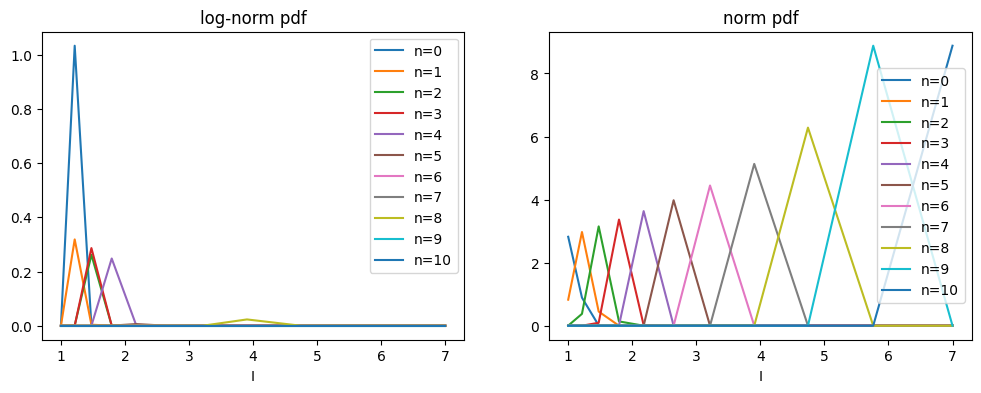

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
cmap = "plasma"

for n, curve in enumerate(l_pdfs):
    axs[0].plot(n_bins_center, curve, label=f"n={n}")
axs[0].set_title("log-norm pdf")
axs[0].set_xlabel("I")
axs[0].legend()

for n, curve in enumerate(n_pdfs):
    axs[1].plot(n_bins_center, curve, label=f"n={n}")
    print(curve)
axs[1].set_title("norm pdf")
axs[1].set_xlabel("I")

axs[1].legend()
plt.show()


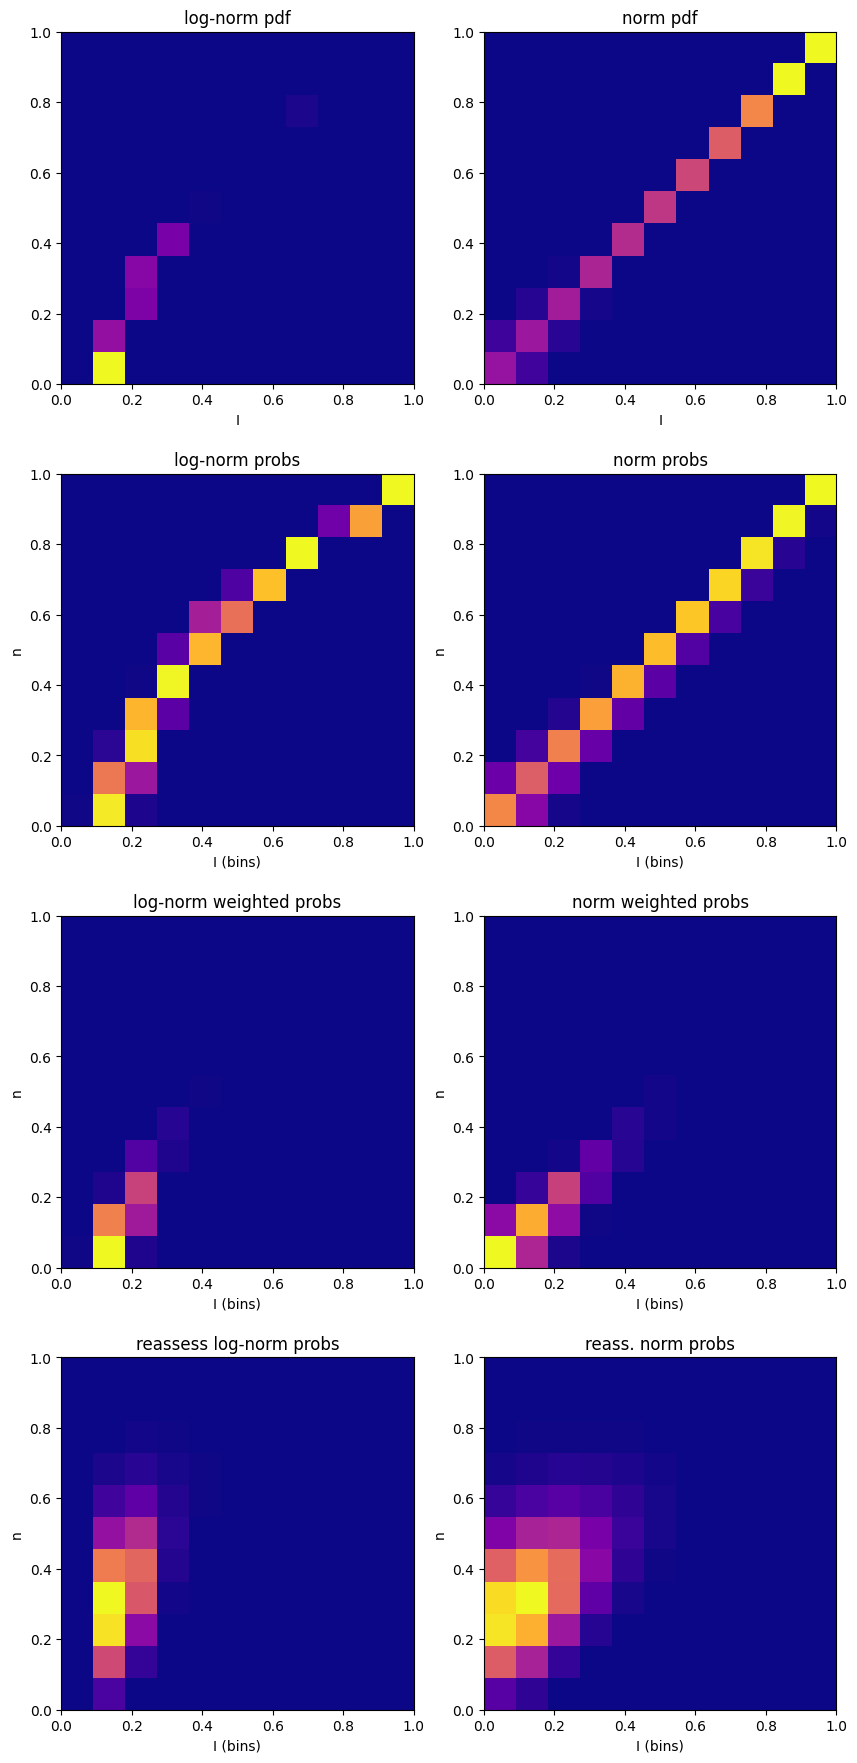

In [9]:
fig, axs = plt.subplots(4, 2, figsize=(10, 22))
cmap = "plasma"

c = axs[0, 0].imshow(l_pdfs[::-1], extent=[0, 1, 0, 1], cmap=cmap,  interpolation='nearest')
axs[0, 0].set_title("log-norm pdf")
axs[0, 0].set_xlabel("I")

nc = axs[0, 1].imshow(n_pdfs[::-1], extent=[0, 1, 0, 1], cmap=cmap,  interpolation='nearest')
axs[0, 1].set_title("norm pdf")
axs[0, 1].set_xlabel("I")

lc = axs[1, 0].imshow(l_probs[::-1], extent=[0, 1, 0, 1], cmap=cmap,  interpolation='nearest')
axs[1, 0].set_title("log-norm probs")
axs[1, 0].set_xlabel("I (bins)")
axs[1, 0].set_ylabel("n")

nc = axs[1, 1].imshow(n_probs[::-1], extent=[0, 1, 0, 1], cmap=cmap,  interpolation='nearest')
axs[1, 1].set_title("norm probs")
axs[1, 1].set_xlabel("I (bins)")
axs[1, 1].set_ylabel("n")

lc = axs[2, 0].imshow(lw_probs[::-1], extent=[0, 1, 0, 1], cmap=cmap,  interpolation='nearest')
axs[2, 0].set_title("log-norm weighted probs")
axs[2, 0].set_xlabel("I (bins)")
axs[2, 0].set_ylabel("n")

nc = axs[2, 1].imshow(nw_probs[::-1], extent=[0, 1, 0, 1], cmap=cmap,  interpolation='nearest')
axs[2, 1].set_title("norm weighted probs")
axs[2, 1].set_xlabel("I (bins)")
axs[2, 1].set_ylabel("n")

lc = axs[3, 0].imshow(rlw_probs[::-1], extent=[0, 1, 0, 1], cmap=cmap,  interpolation='nearest')
axs[3, 0].set_title("reassess log-norm probs")
axs[3, 0].set_xlabel("I (bins)")
axs[3, 0].set_ylabel("n")

nc = axs[3, 1].imshow(rnw_probs[::-1], extent=[0, 1, 0, 1], cmap=cmap,  interpolation='nearest')
axs[3, 1].set_title("reass. norm probs")
axs[3, 1].set_xlabel("I (bins)")
axs[3, 1].set_ylabel("n")

plt.show()

## Reassesses probs

In [10]:
# Reassessment doesn't change total probs

r_probs = sys_model.reassessment_probs(probs)
r_w_probs = sys_model.reassessment_probs(w_probs)

print(f"Sum reassessed norm prob array = {np.sum(r_probs)}")
print(f"Sum reassessed Poisson * norm prob array = {np.sum(r_w_probs)}")

NameError: name 'sys_model' is not defined

## For plotting:

#### For better representation, flip array: [n_max x n_bins][::-1].


-------------------


                bins
         -------------------  <- nmax  
         -------------------
         -------------------
         -------------------
      n  -------------------
         -------------------
         -------------------
         -------------------  <- n=0 
         
         
-------------------

In [ ]:
fig, axs = plt.subplots(1, 2)
cmap = "plasma"

z_prob = w_probs[::-1]
rz_prob = r_w_probs[::-1]

c = axs[0].imshow(z_prob, extent=[0, 1, 0, 1], cmap=cmap,  interpolation='nearest')
axs[0].set_title("probs")
axs[0].set_xlabel("I (bins)")
axs[0].set_ylabel("n")

rc = axs[1].imshow(rz_prob, extent=[0, 1, 0, 1], cmap=cmap,  interpolation='nearest')
axs[1].set_title("reassessed probs")
axs[1].set_xlabel("I (bins)")
axs[1].set_ylabel("n")

plt.show()

## GA Model Instance

In [ ]:
ga_model = GAModel()

## Get transitions matrix

In [ ]:
idx, transitions = ga_model.get_transitions_matrix(probs, n_step=n_step)


## Get best path in GA for a system

#### Method returns probs for each step and path.

In [ ]:
step_probs, path = ga_model.get_best_path(probs, minimize=False)

## Plot probs and best paths

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(17, 20))
cmap = "plasma"

i_0s = [2, 3, 4, 5] 
sigmas2_0 = [0.02, 0.1, 0.2, 0.5]

for idx1, i0 in enumerate(i_0s):
    for idx2, s0 in enumerate(sigmas2_0):

        sys_model = ProteinSystemModel(M, i0, i_nat, s0)
        prob_arr = sys_model.get_probs()
        ga_model = GAModel()
        path = ga_model.get_best_path(prob_arr, minimize=minimize)[0]
        z_prob = np.fliplr(prob_arr[::-1]) if minimize else prob_arr[::-1]
        c = axs[idx1, idx2].imshow(z_prob, extent=[0, 1, 0, 1], 
                                   cmap=cmap,  interpolation='nearest')
        x = [(x[1] / n_bins) + 0.5 * 1 / n_bins for x in path]
        y = [(x[0] / (n_max)) + 0.5 * 1 / (n_max) for x in path]
        ax=axs[idx1, idx2]
        fig.colorbar(c, ax=ax)
        axs[idx1, idx2].plot(x, y)
        axs[idx1, idx2].set_title("".join([r'$I _{0}$', f": {i0};  ", 
                                           r'$\sigma _{0} ^{2}$', f" :{s0}"]))
        
        if idx2 == 0:
            axs[idx1, idx2].set_ylabel("n")
        if idx1 == 3:
            axs[idx1, idx2].set_xlabel("I")
            

plt.show()